## DATA ANALYTICS PROJECT BY ANKITA KUMARI

## Superstore Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', 22)
pd.set_option('display.max_rows', 10)

In [2]:
#load the dataset
df= pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


* Removing the postal code as its of no use for data analysis

In [3]:
df.drop(columns="Postal Code", inplace=True)

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
print(df["Ship Mode"].unique())
print(df["Segment"].unique())
print(df["Country"].unique())
print(df["Category"].unique())
print(df["Sub-Category"].unique())
print(df["Region"].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['South' 'West' 'Central' 'East']


* The country code can be removed as it is repeated through out. This in corrected in the line of code below.

In [6]:
df.drop(['Country'], inplace = True, axis = 1)

In [7]:
#Statistical description of data
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


In [9]:
df.isna().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
               ..
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
Length: 11, dtype: int64

In [10]:
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Region             4
                ... 
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
Length: 11, dtype: int64

In [11]:
#Correlation between the variables
# its helps to find the correlation of all numeriical columns in dataframe.
# For any non-numeric type of column in dataframe it is ignored
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [42]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

#### Heatmap for correlation
- This is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The darker the colour, the stronger the correlation, the lighter the colour, the lesser the correlation.

In [43]:
heatmap = df[['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']]
heatmap.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


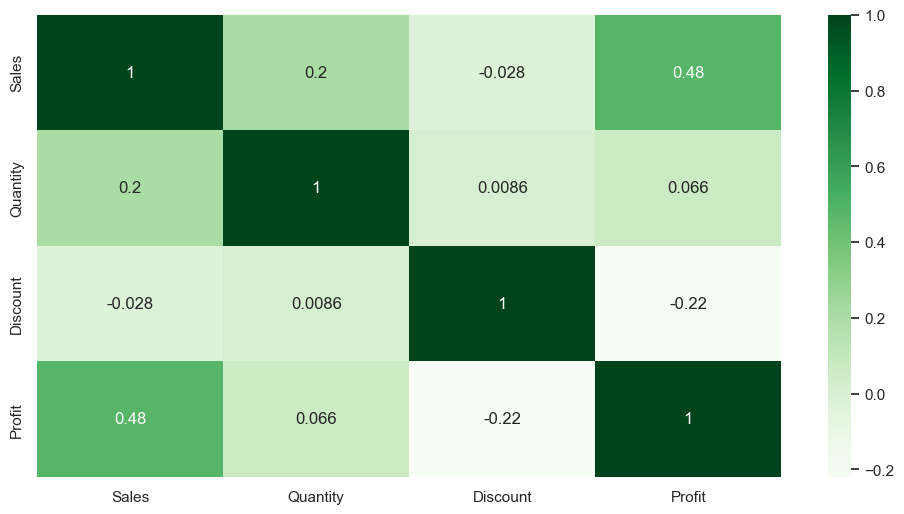

In [44]:
plt.figure(figsize=(12,6))
sns.set_theme(style="white")
corr = heatmap.corr()
heatmap = sns.heatmap(corr, annot=True, cmap = 'Greens')

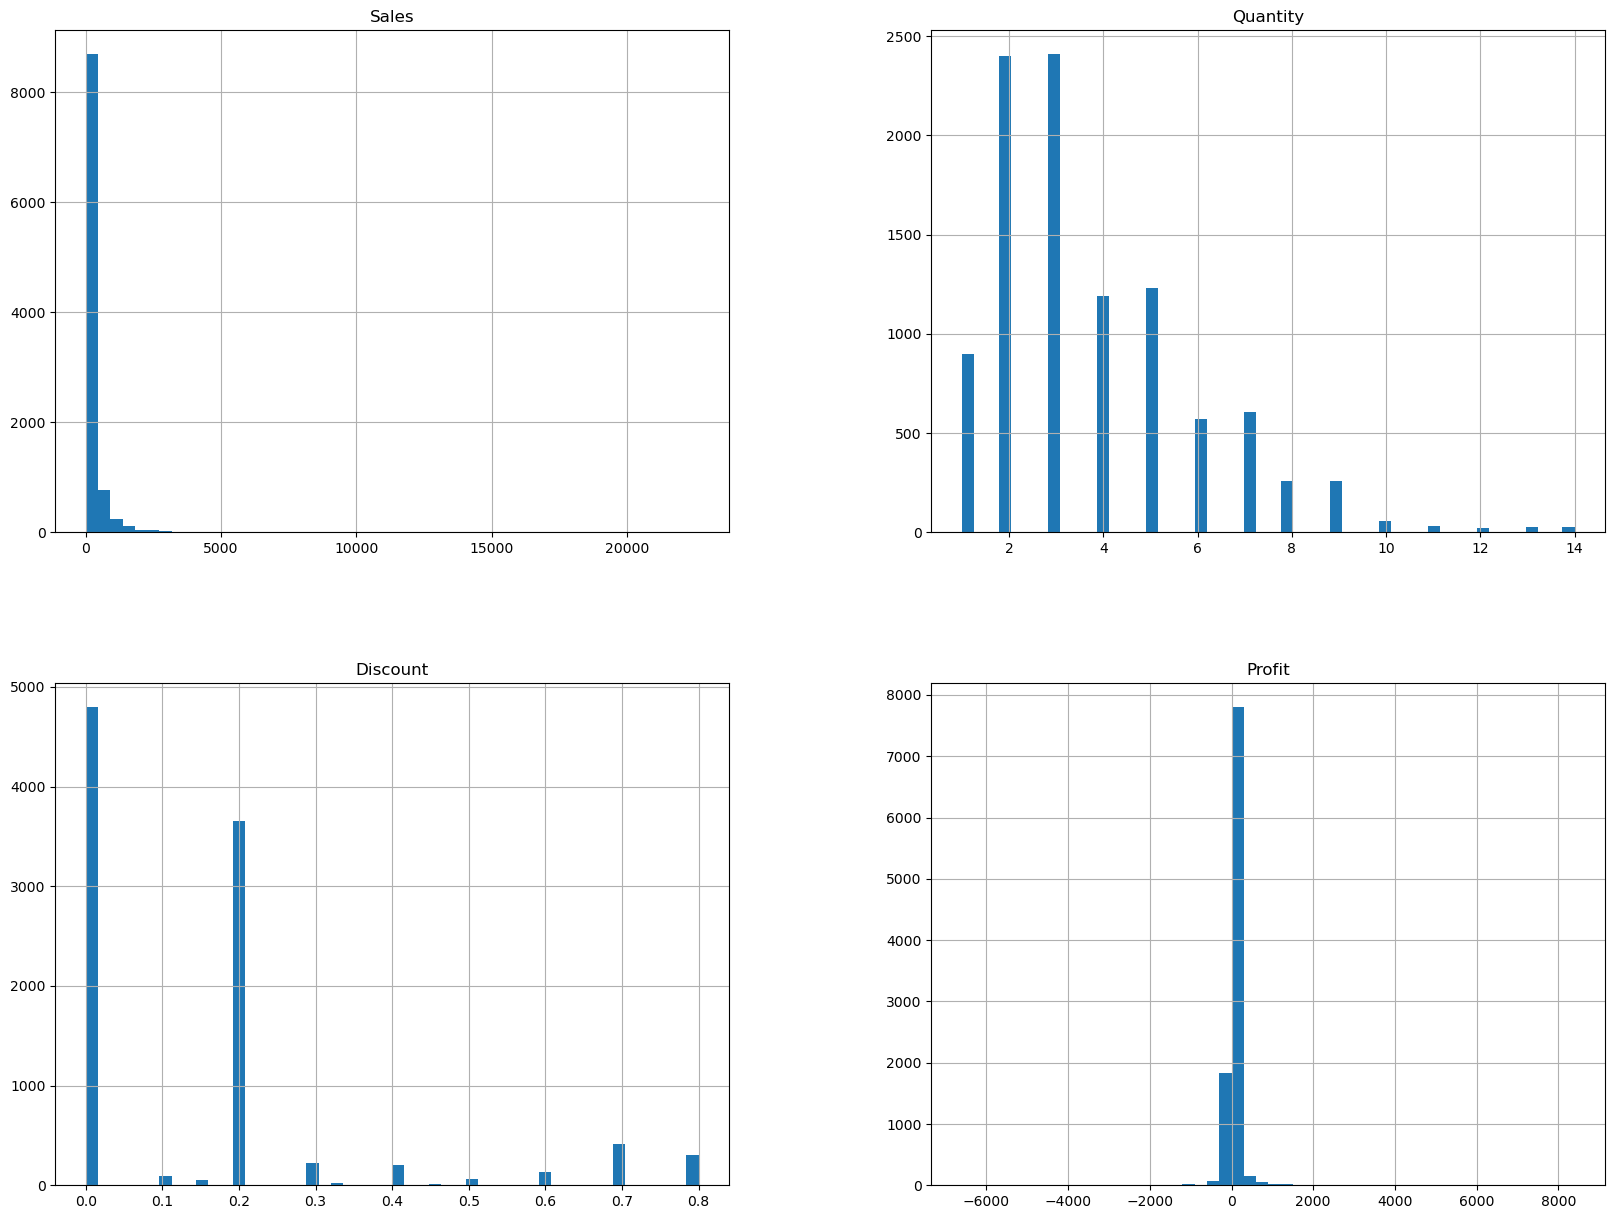

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
#Covariance of columns
# Its the measure of strength of correlation b/w two variables or more set of variables.
# if the covariance = 0 then the variable are uncorrelated
#                   > 0 then the variable are Positively correlated
#                   < 0 then the variable are Negatively correlated

df.cov()

,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


In [14]:
df.iloc[0]

Ship Mode       Second Class
Segment             Consumer
City               Henderson
State               Kentucky
Region                 South
                    ...     
Sub-Category       Bookcases
Sales                 261.96
Quantity                   2
Discount                 0.0
Profit               41.9136
Name: 0, Length: 11, dtype: object

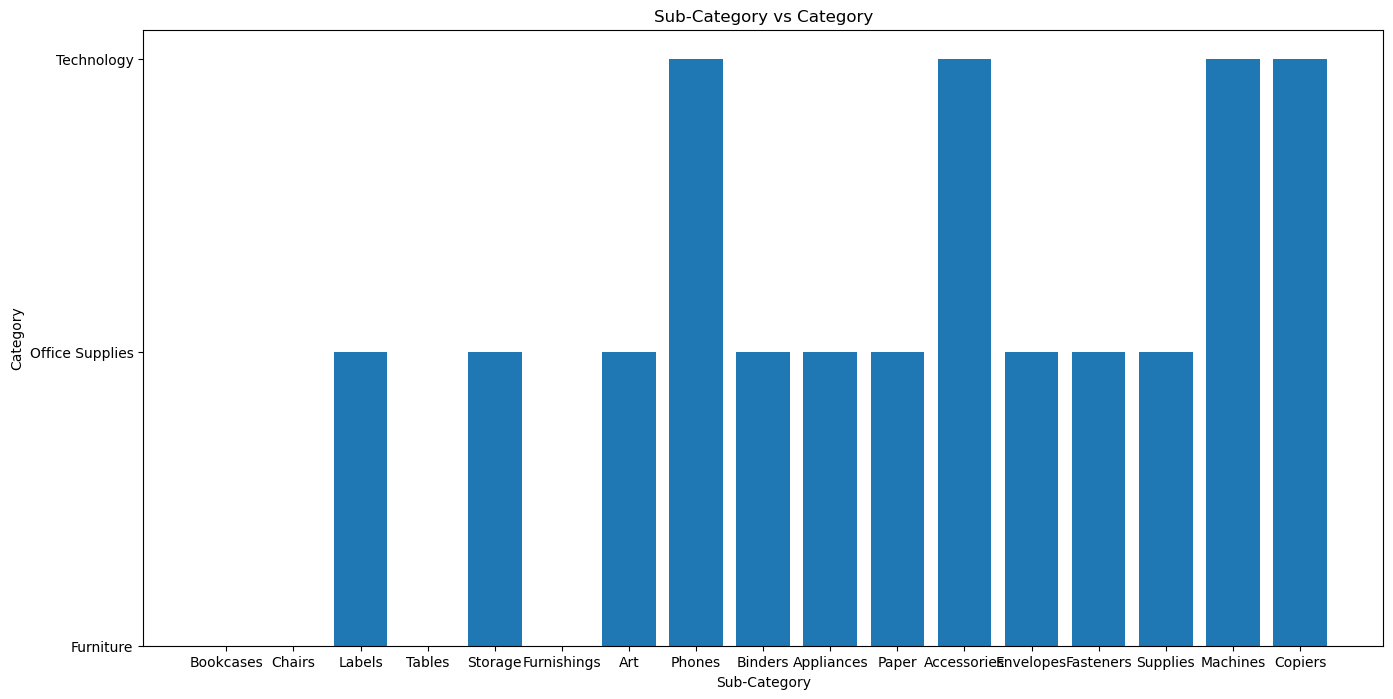

In [15]:
#DATA VISUALIZATION

plt.figure(figsize=(16,8))
plt.bar('Sub-Category', 'Category', data=df)
plt.title('Sub-Category vs Category')
plt.xlabel ('Sub-Category')
plt.ylabel ('Category')
plt.show()

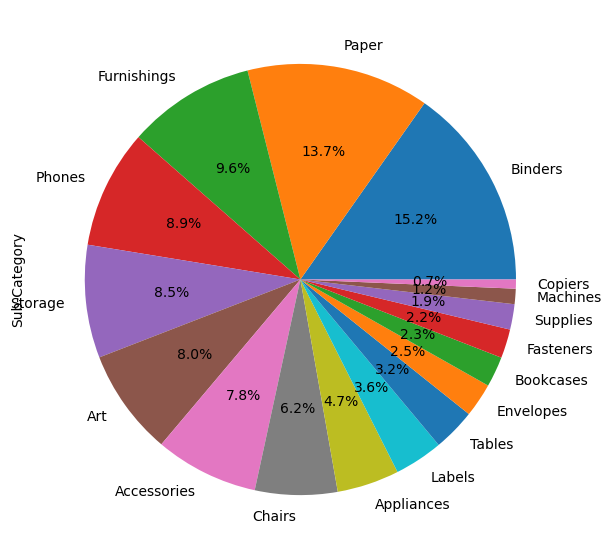

In [16]:
plt.figure(figsize=(12,7))
df["Sub-Category"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

* From this piechart the store has wide vareity of office supplies specifically in binders & paper department.

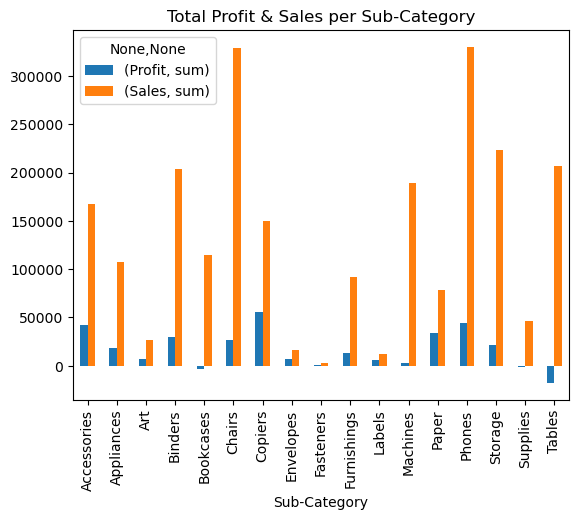

In [17]:
#Bar plot in between Sales VS Profit
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title ("Total Profit & Sales per Sub-Category")
plt.rcParams['figure.figsize']=[10,9]
plt.show()

* 1.From above we conclude highest profit is earned in copiers while selling price for chairs & phones is extremely hing compared to other products. 2.Also tables & bookcases department are in loss as people dont prefer to buy it from superstore.

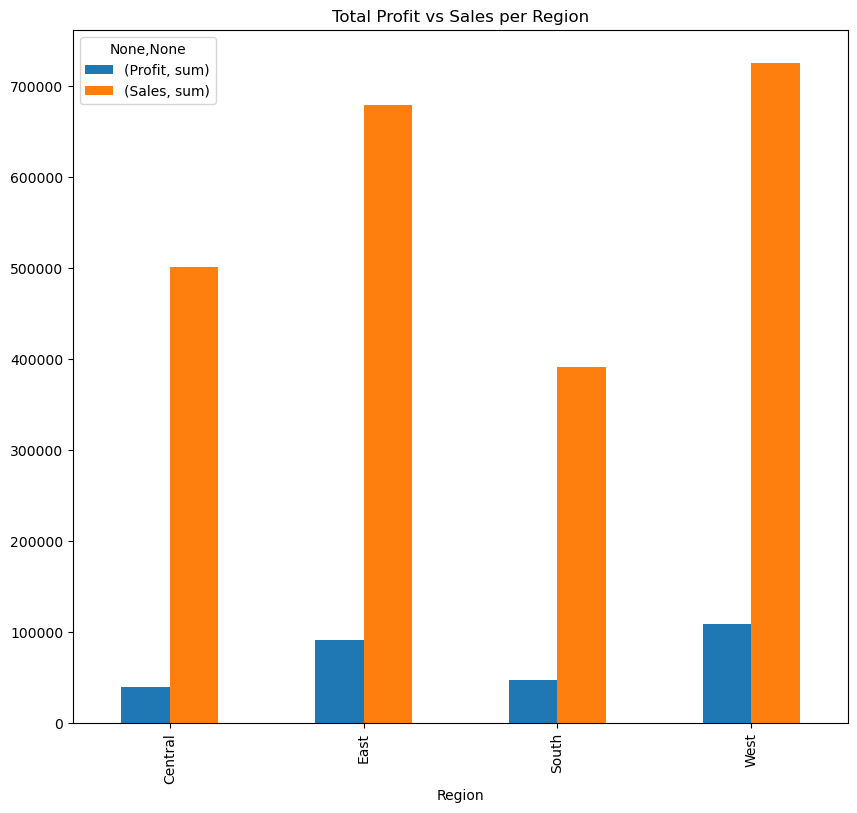

In [18]:
#Sales and Profit Region Wise
df.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar() 
plt.title('Total Profit vs Sales per Region')
plt.rcParams['figure.figsize'] = [10,9]
plt.show()

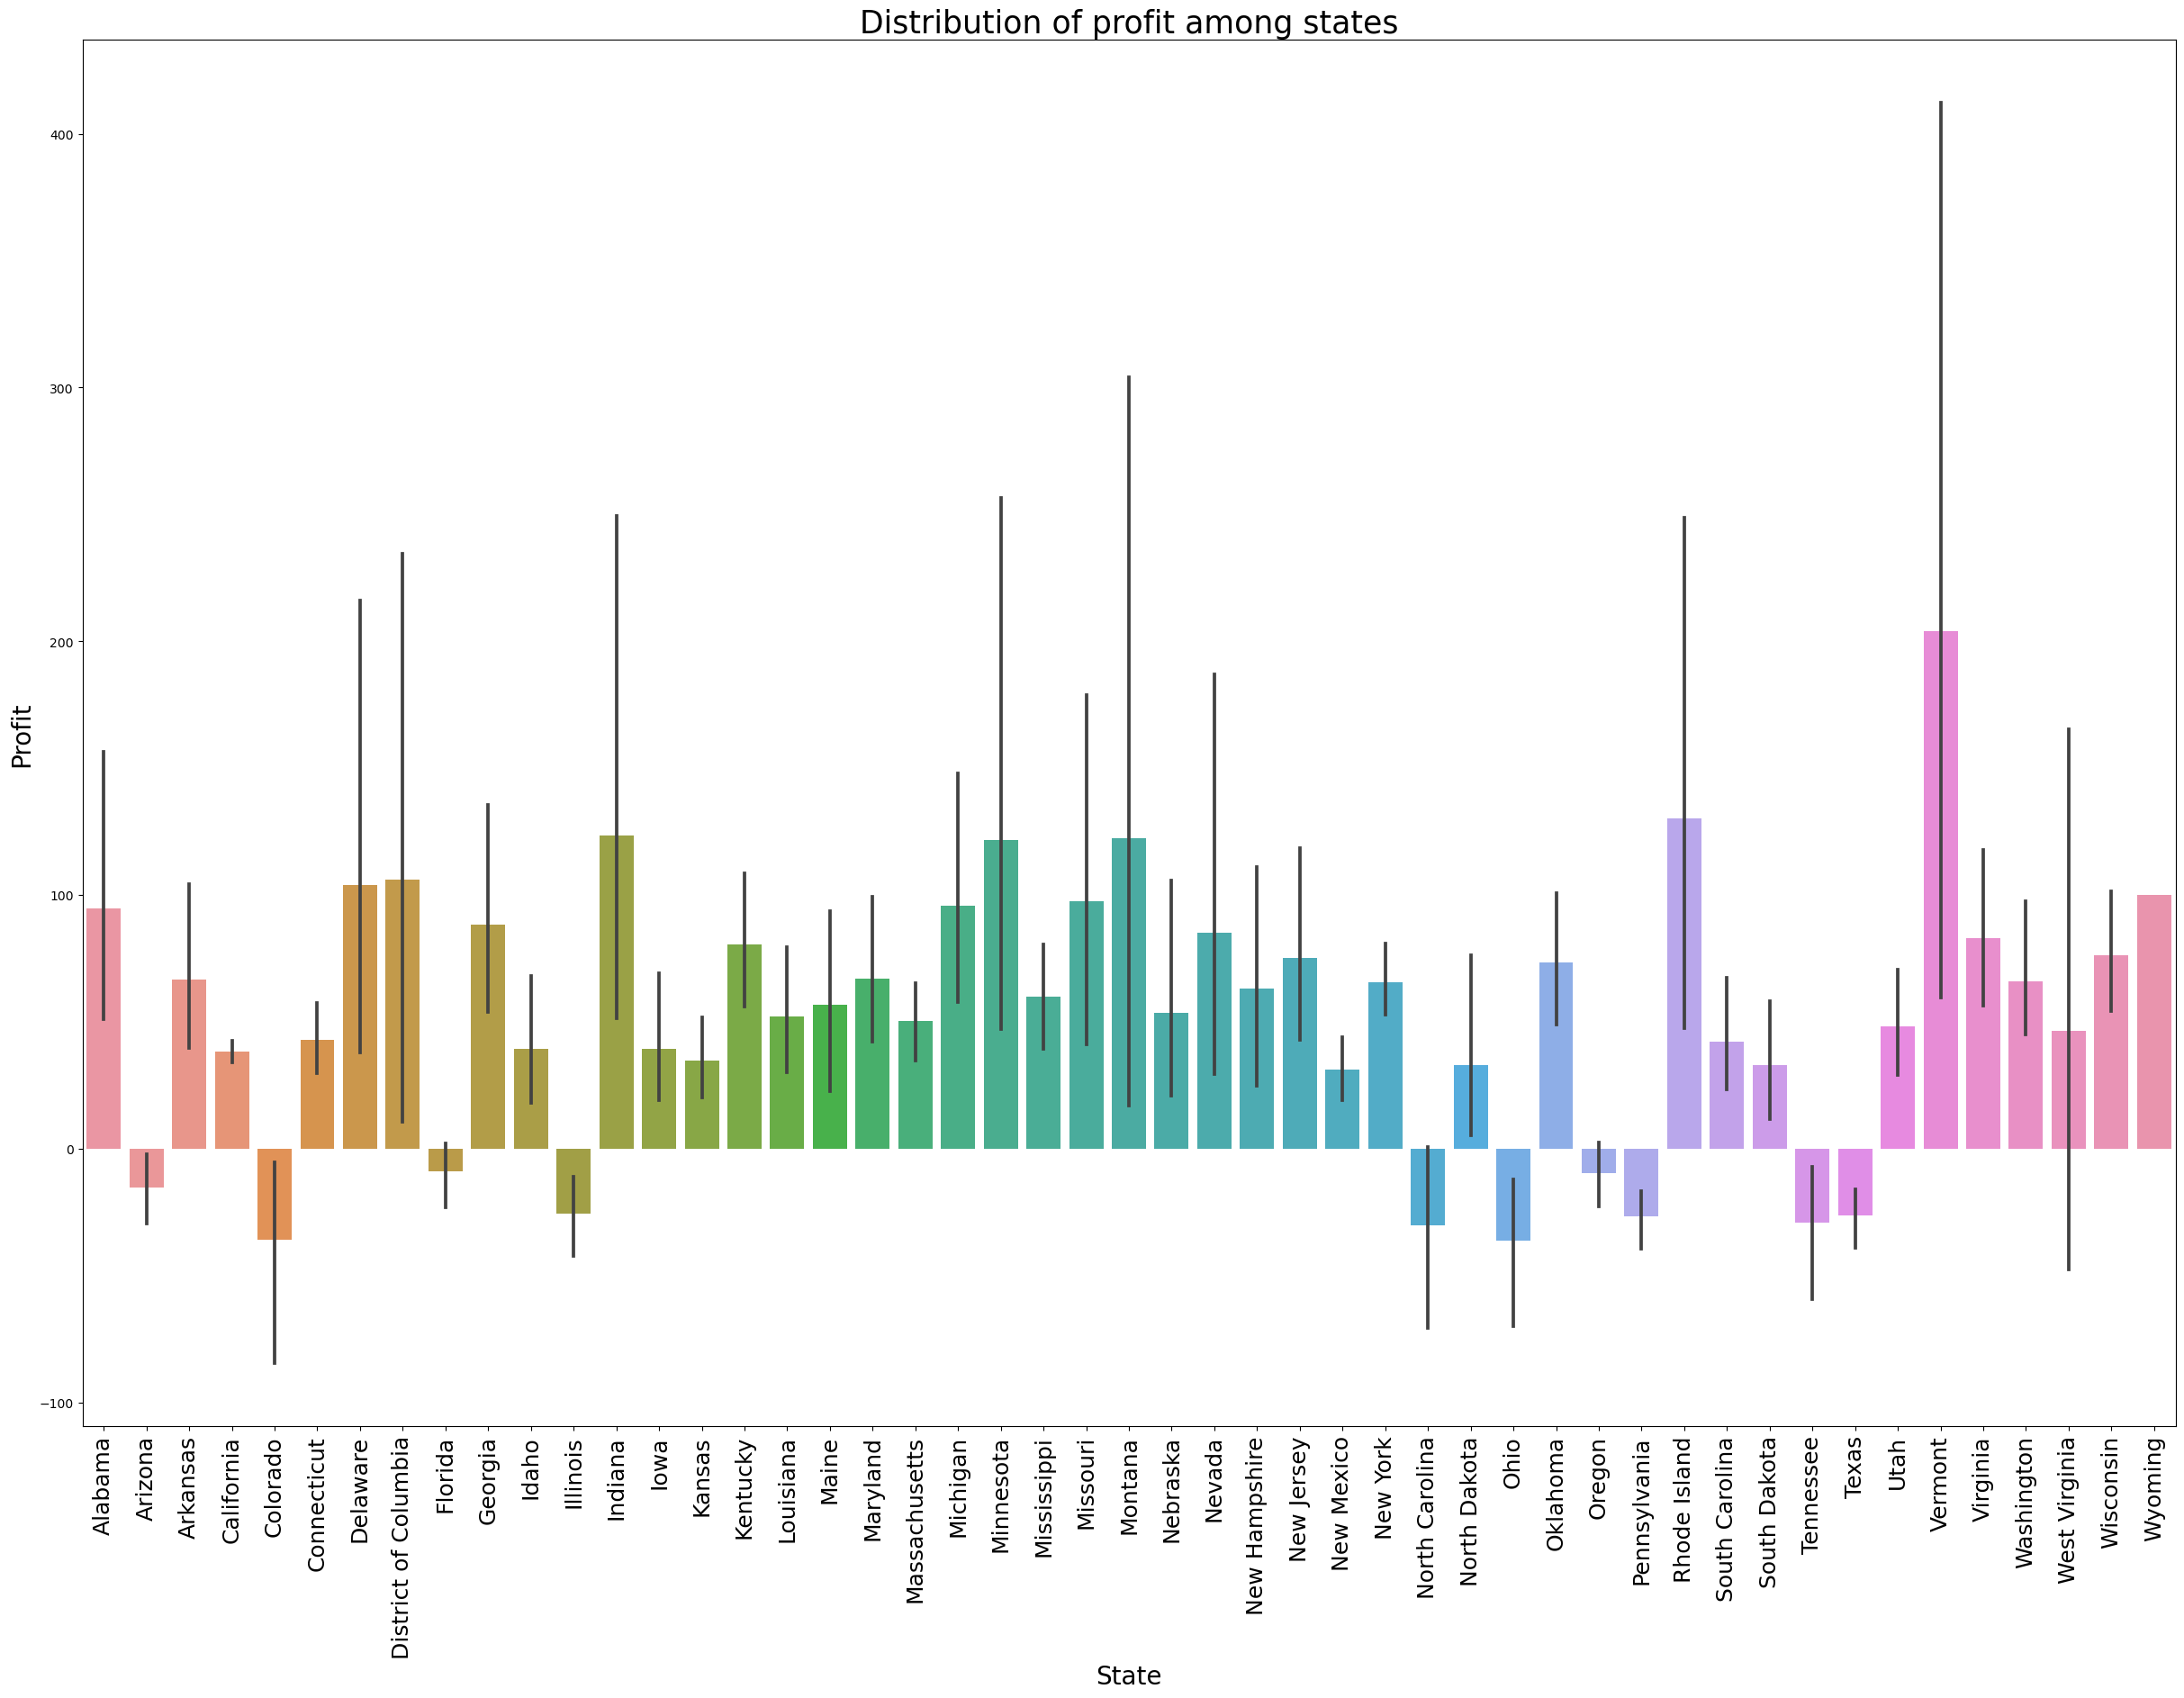

In [19]:
plt.figure(figsize=(30,20))
sns.barplot(x=df['State'].sort_values(ascending=True),y=df['Profit'])
plt.title('Distribution of profit among states',fontsize=25)
plt.xticks(rotation=90,fontsize=18)
plt.xlabel('State',fontsize=20)
plt.ylabel('Profit',fontsize=20)
plt.show()

<Axes: xlabel='Segment', ylabel='count'>

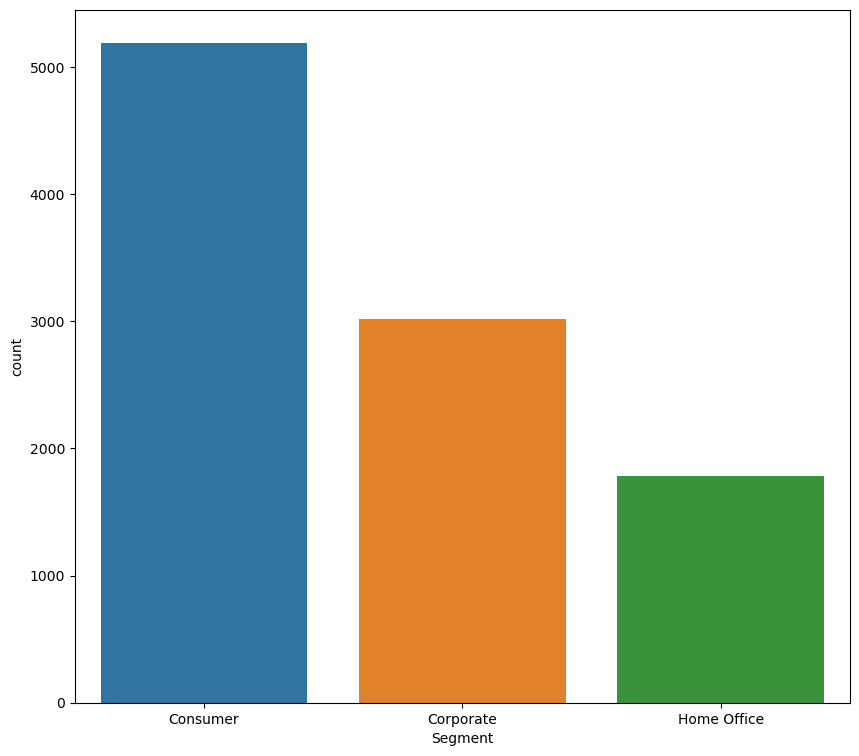

In [20]:
#now lets check count plot of segment
sns.countplot(x=df['Segment'])

<Axes: xlabel='Category', ylabel='count'>

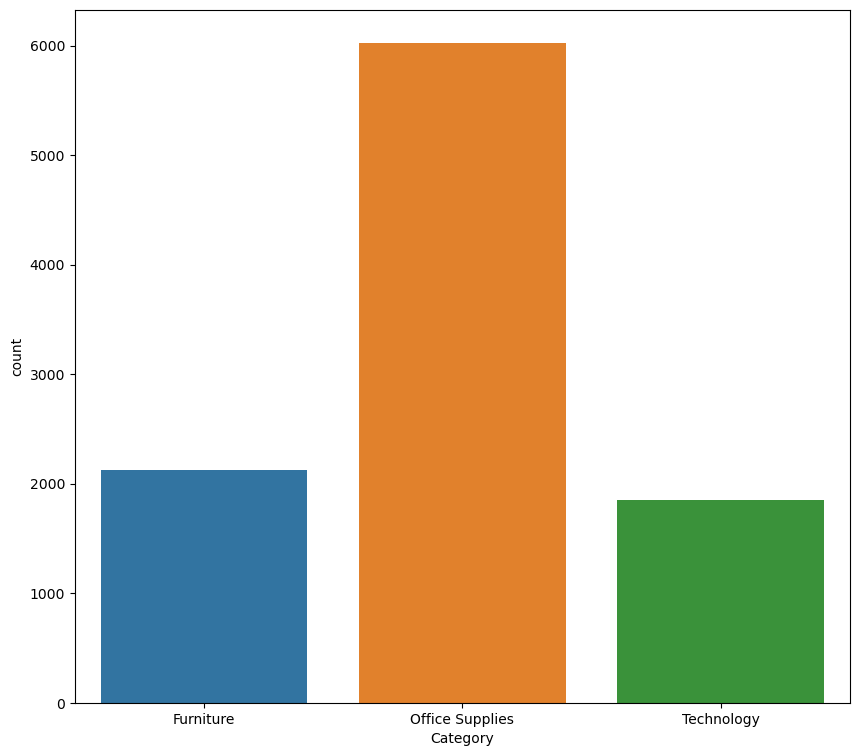

In [21]:
#now lets check count plot of segment
sns.countplot(x=df['Category'])

<Axes: xlabel='Region', ylabel='count'>

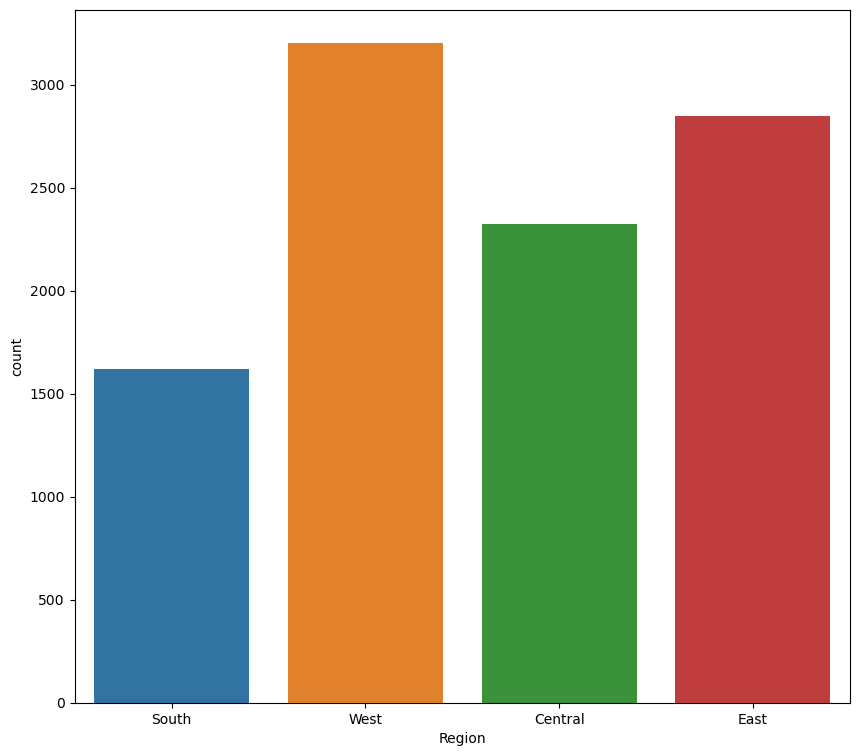

In [22]:
#now lets check count plot of region
sns.countplot(x=df['Region'])

<function matplotlib.pyplot.legend(*args, **kwargs)>

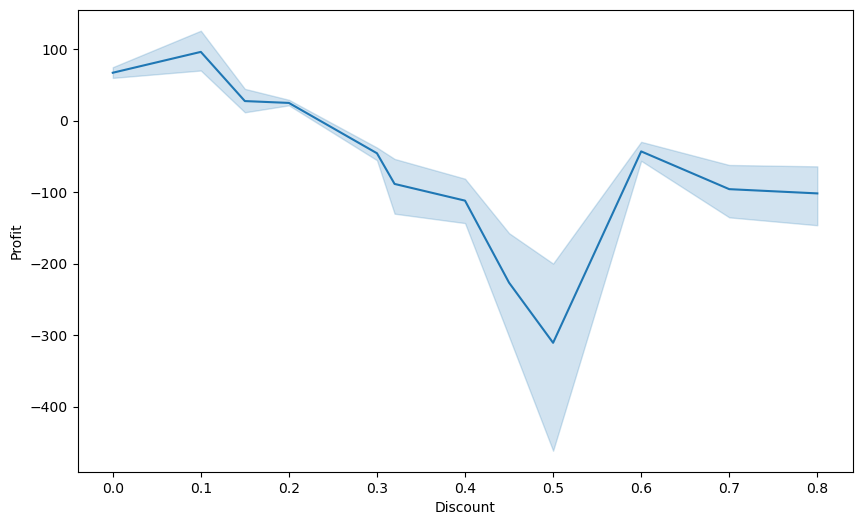

In [23]:
#line plot of discount vs Profit
plt.figure(figsize=(10,6))
sns.lineplot(x='Discount',y='Profit',data=df)
plt.legend

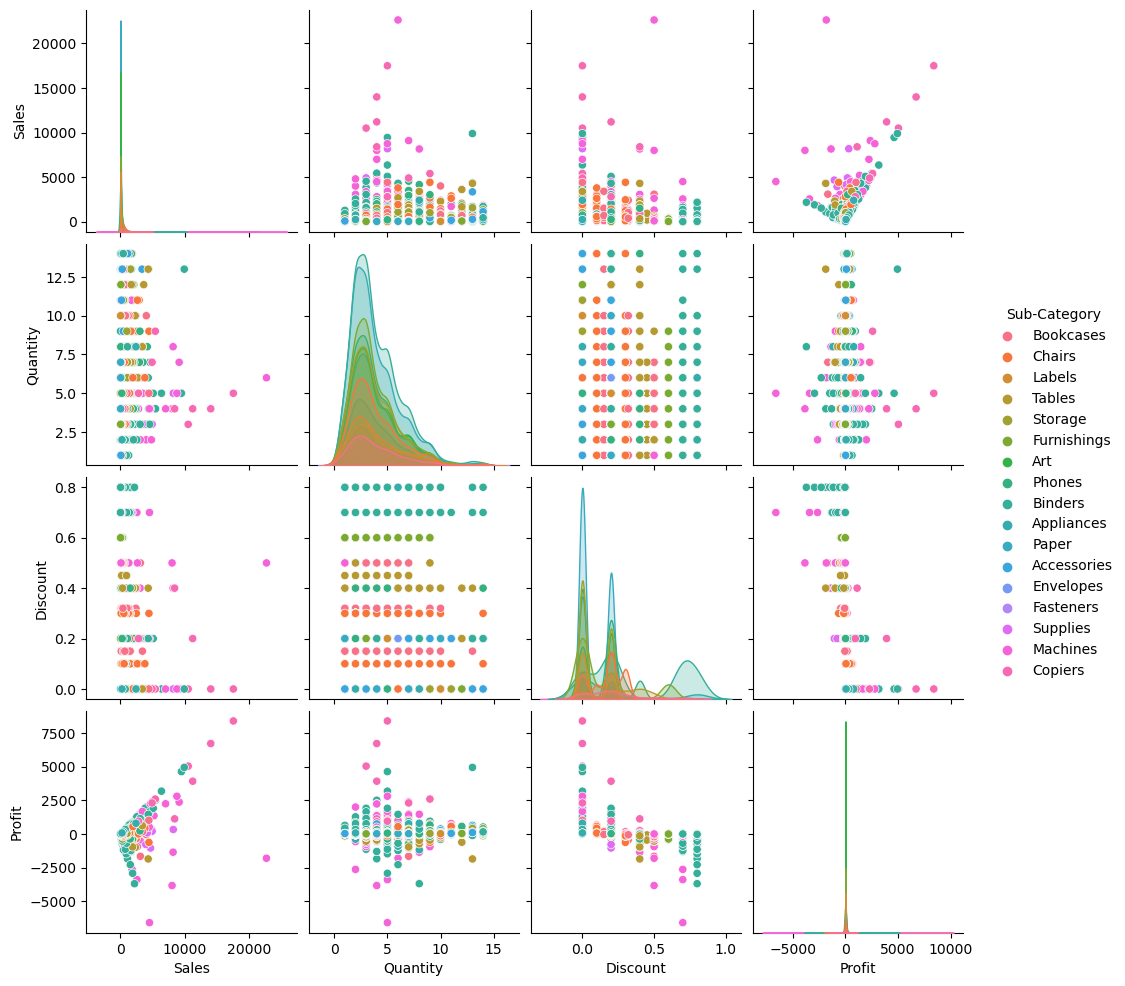

In [24]:
#pair plot of sub category
figsize=(15,12)
sns.pairplot(df,hue='Sub-Category')

<Axes: >

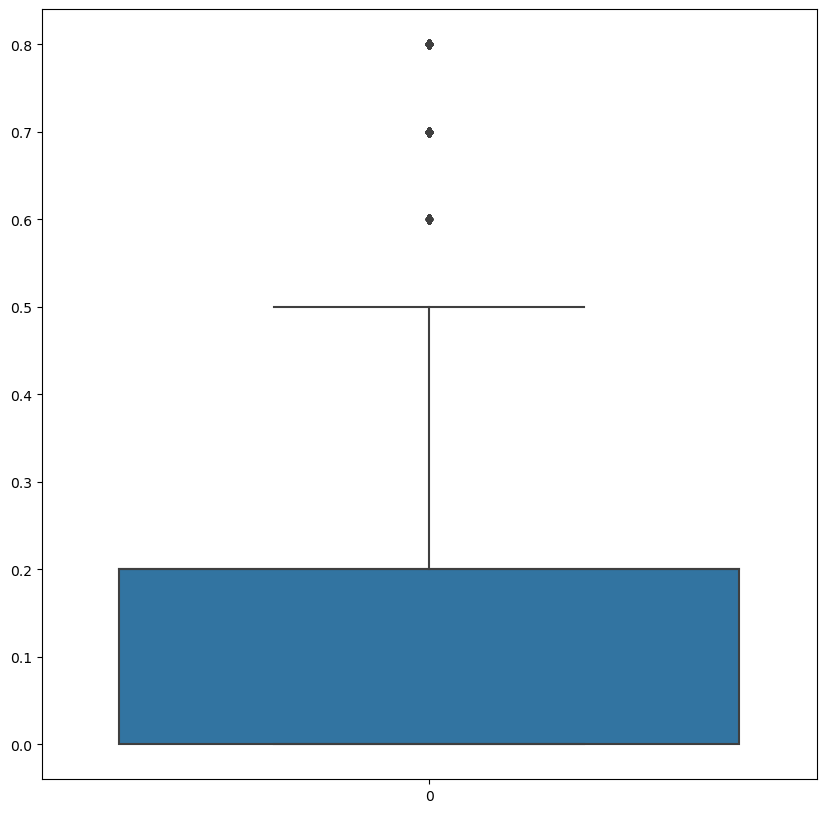

In [26]:
#box plot of discount values
fig, axes = plt.subplots (figsize =(10,10))
sns.boxplot (df ['Discount'])

<Axes: xlabel='Region'>

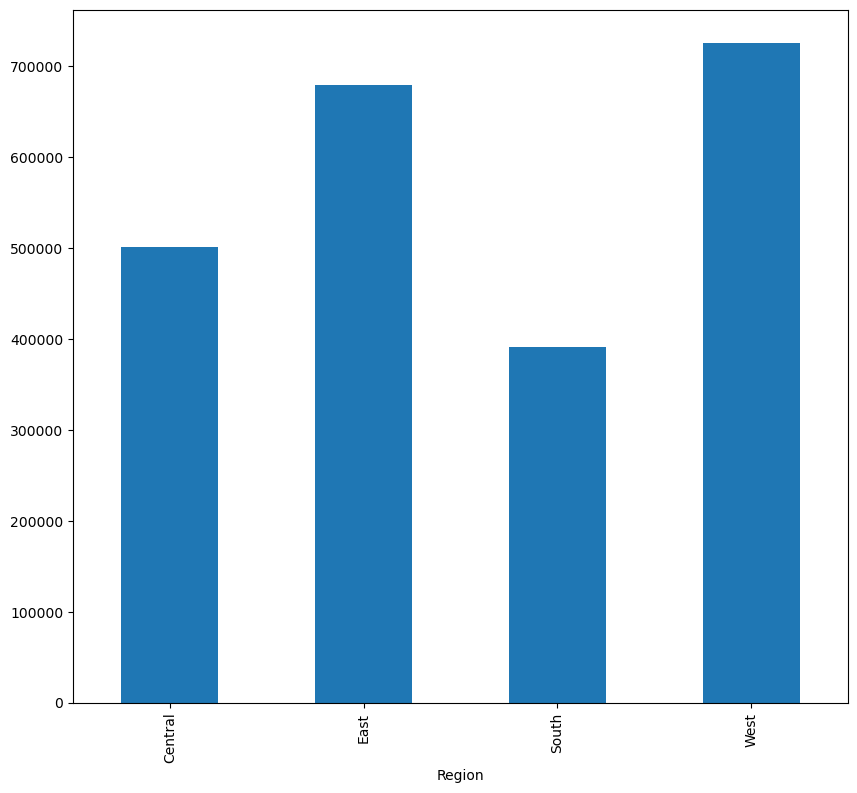

In [27]:
# Sales analysis based on region
df.groupby("Region")["Sales"].sum().plot.bar()

<Axes: xlabel='Region'>

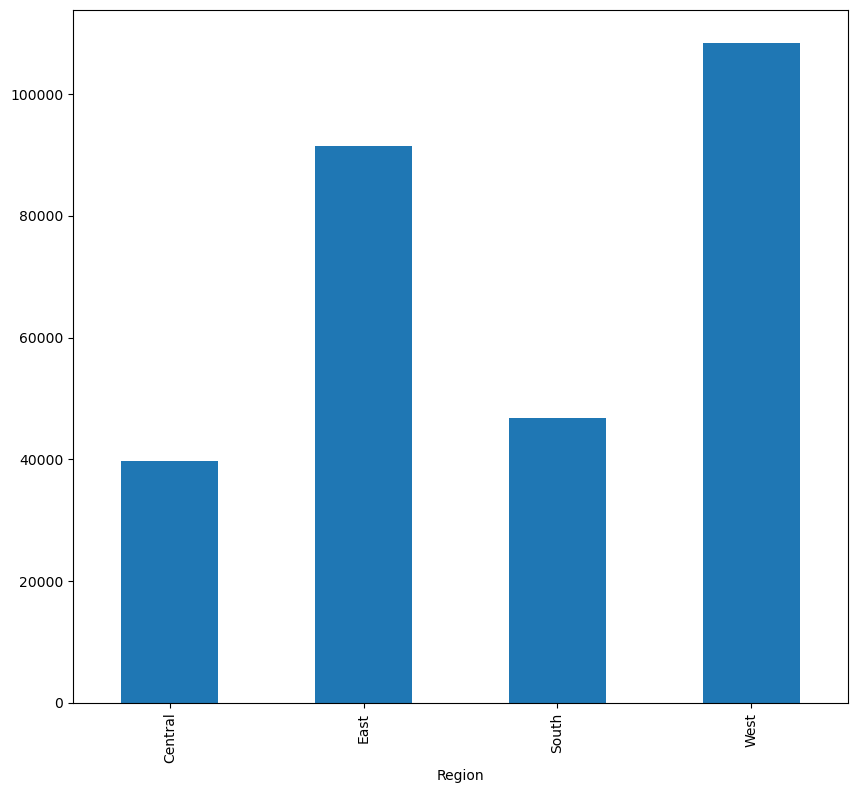

In [28]:
df.groupby("Region")["Profit"].sum().plot.bar()

<Axes: ylabel='Sales'>

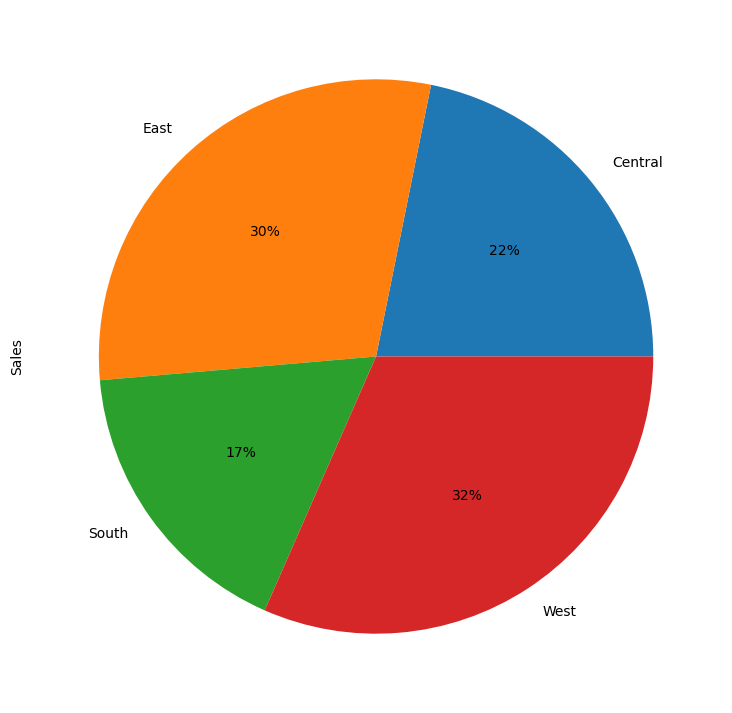

In [29]:
df.groupby("Region")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<Axes: ylabel='Profit'>

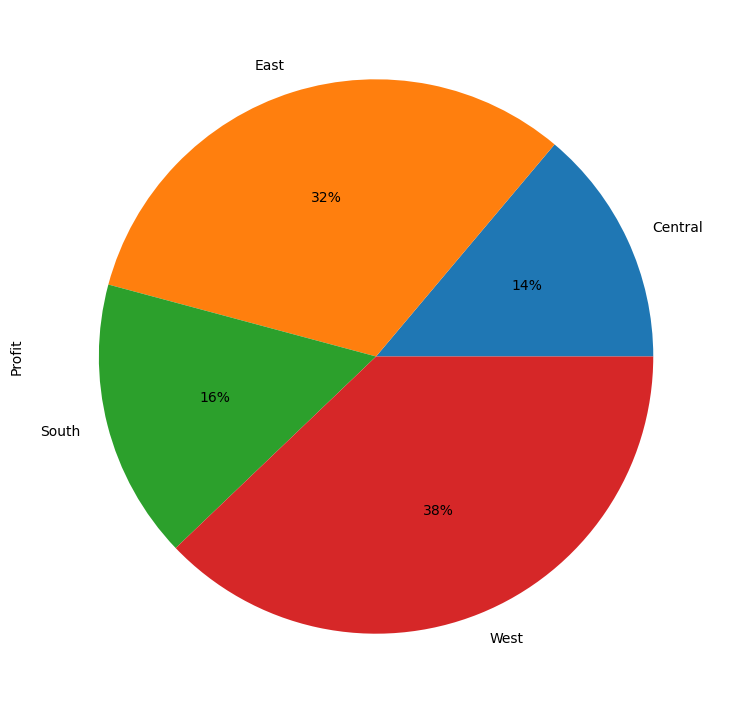

In [30]:
df.groupby("Region")["Profit"].sum().plot.pie(autopct="%1.0f%%")

<Axes: xlabel='Segment'>

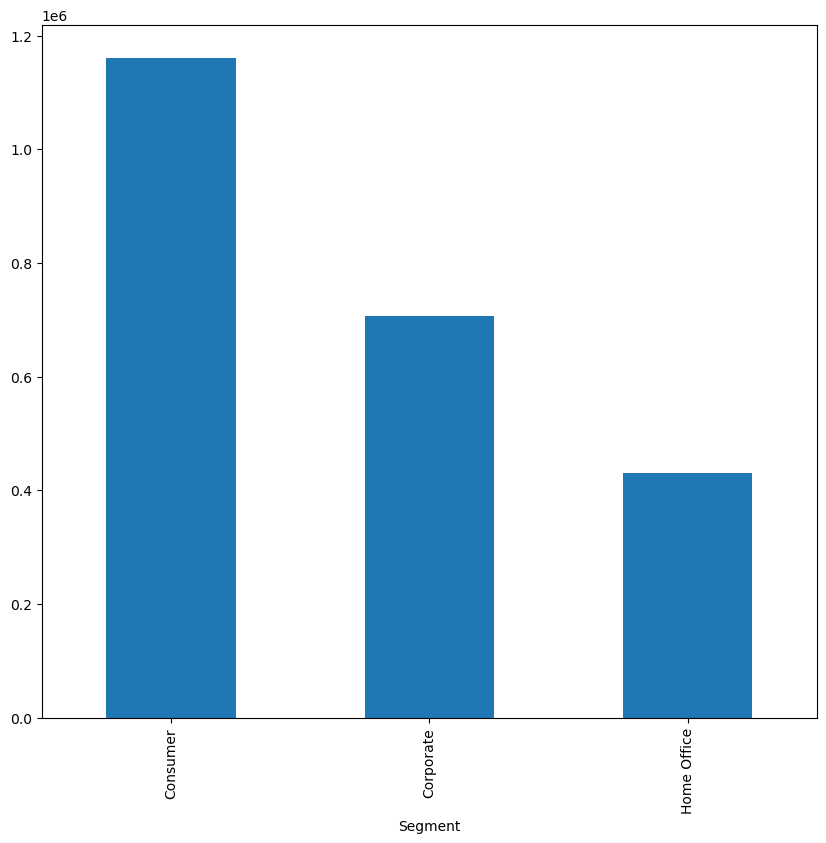

In [31]:
df.groupby("Segment")["Sales"].sum().plot.bar()

<Axes: xlabel='Segment'>

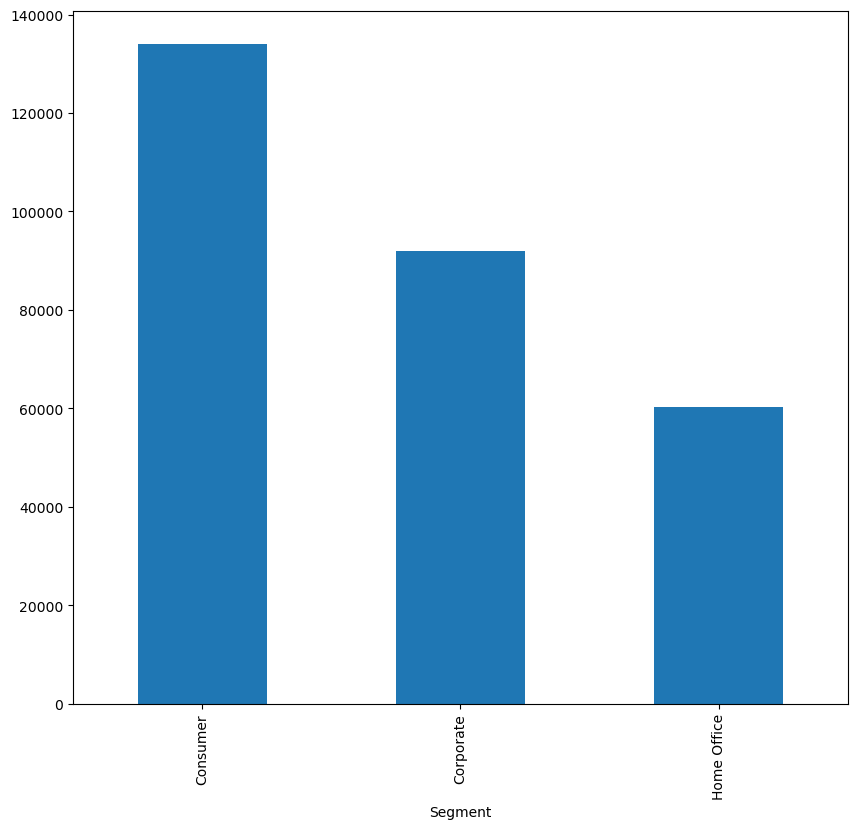

In [32]:
df.groupby("Segment")["Profit"].sum().plot.bar()

<Axes: xlabel='Category'>

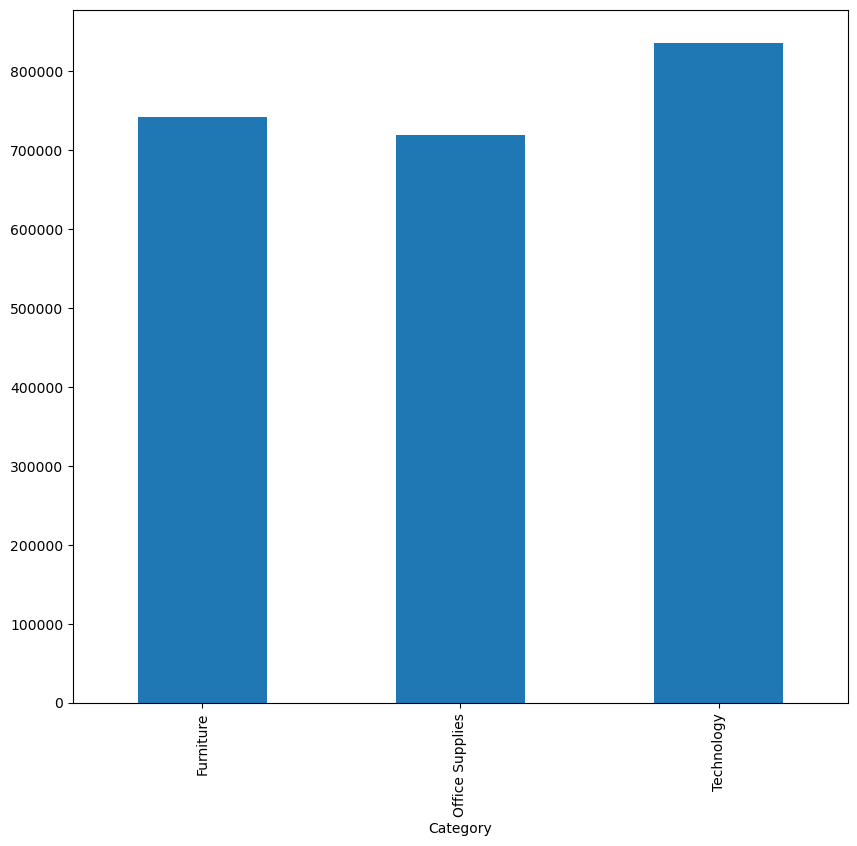

In [33]:
df.groupby("Category")["Sales"].sum().plot.bar()

<Axes: xlabel='Category'>

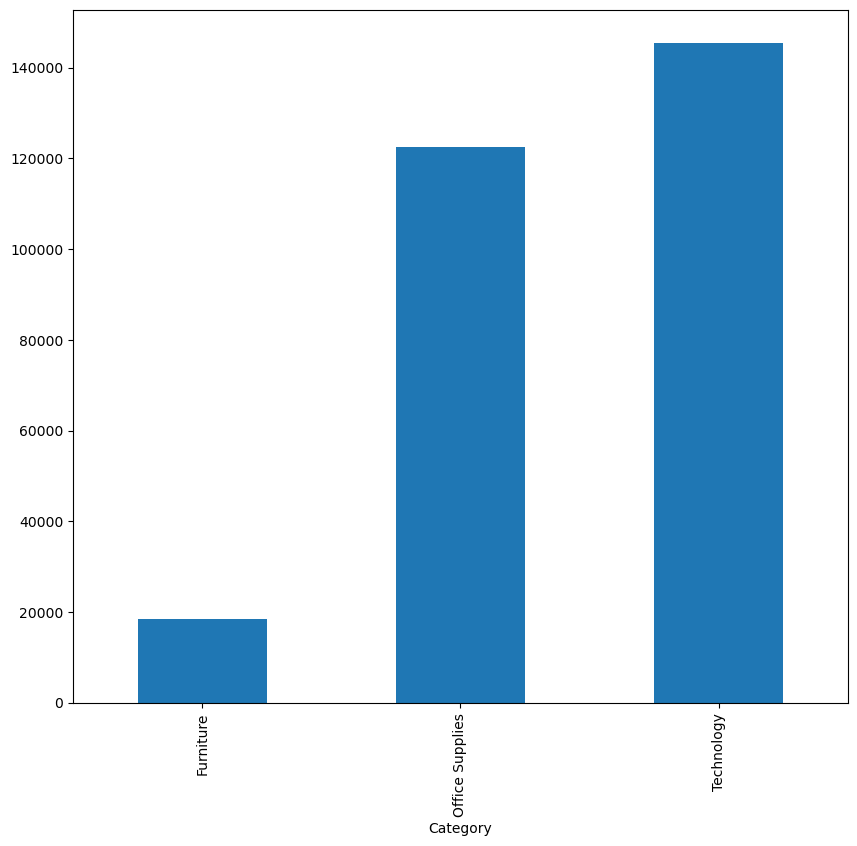

In [34]:
df.groupby("Category")["Profit"].sum().plot.bar()

<Axes: ylabel='Sales'>

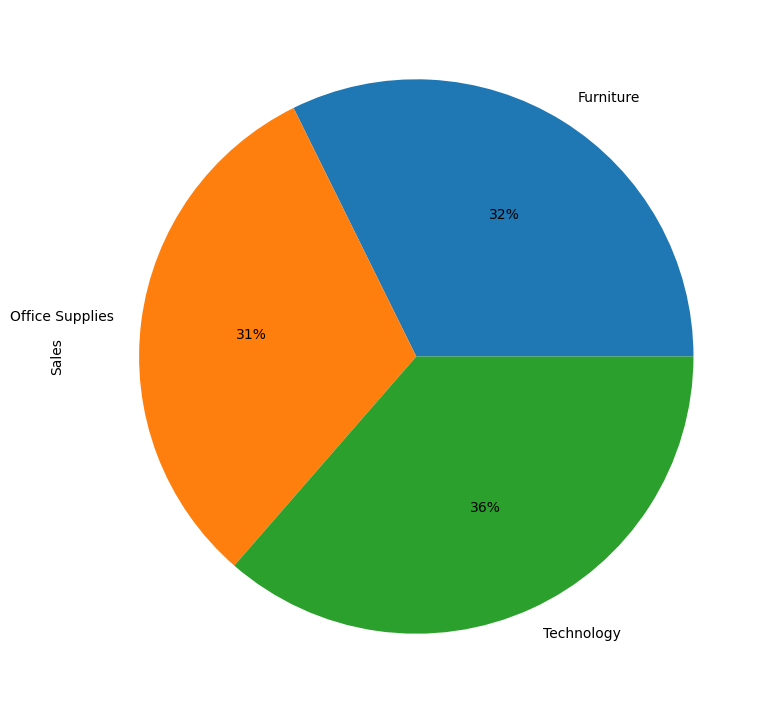

In [35]:
df.groupby("Category")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<Axes: ylabel='Profit'>

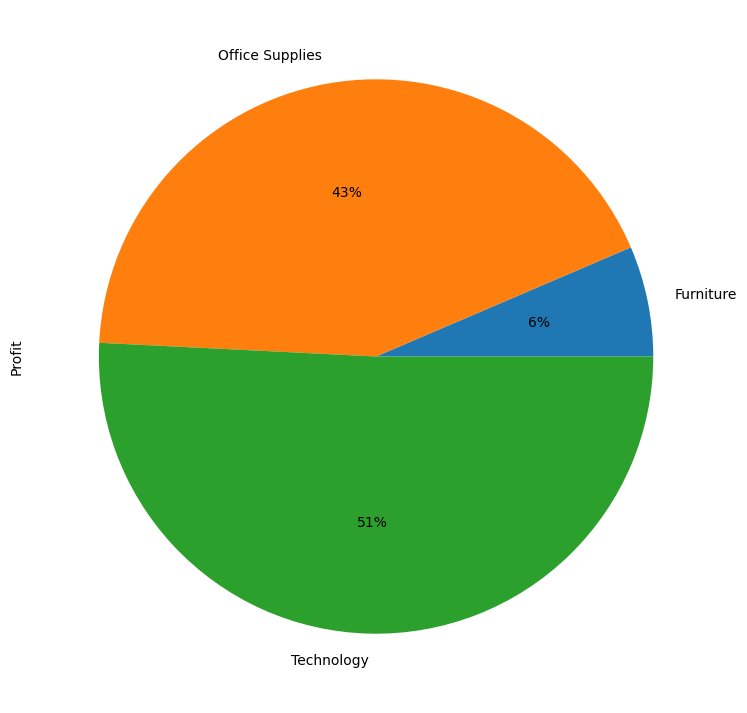

In [36]:
df.groupby("Category")["Profit"].sum().plot.pie(autopct="%1.0f%%")

<Axes: xlabel='State'>

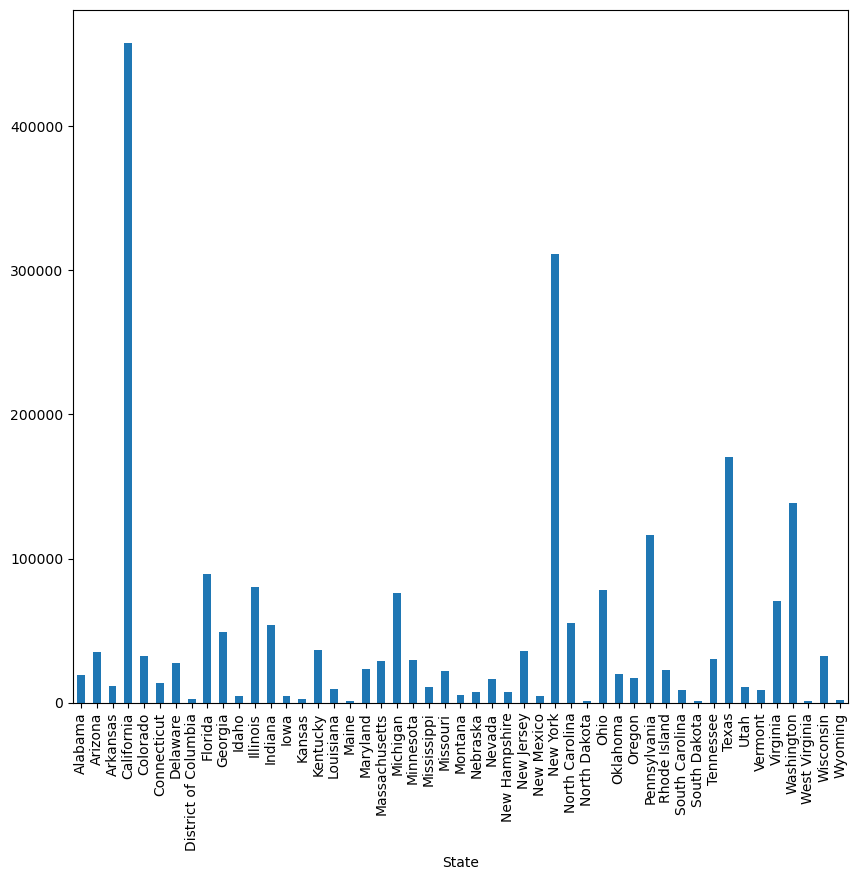

In [37]:
df.groupby("State")["Sales"].sum().plot.bar()

<Axes: xlabel='State'>

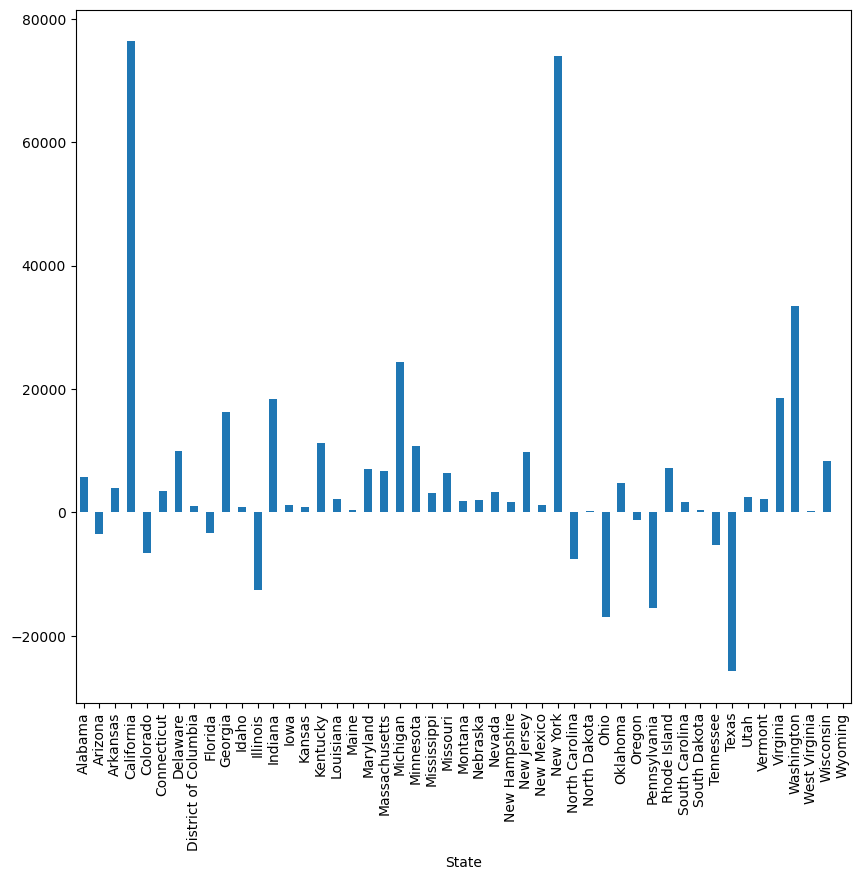

In [38]:
df.groupby("State")["Profit"].sum().plot.bar()

<Axes: xlabel='State'>

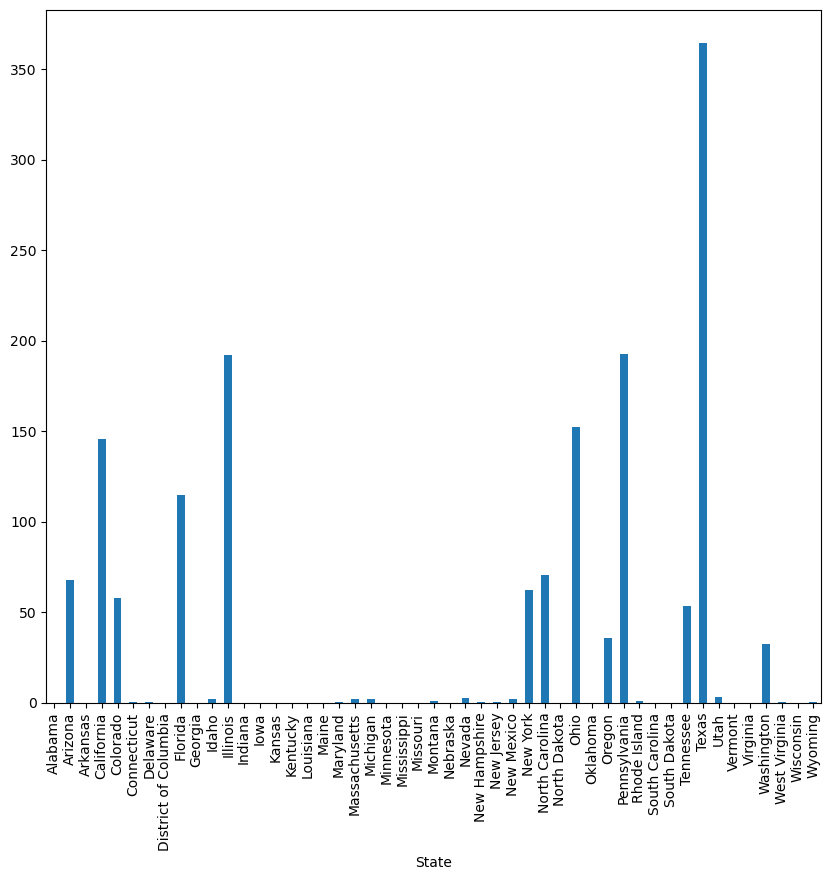

In [39]:
df.groupby("State")["Discount"].sum().plot.bar()